<a href="https://colab.research.google.com/github/prinsha13/6CS012_Worksheet/blob/main/6CS012_Worksheet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Python Imaging Library(PIL)

##Exercise-01

1. Read and display the image.

In [23]:
from PIL import Image #importing library to import image

In [24]:
image = Image.open("/content/drive/MyDrive/AI and DL/Week-01/image.png") #Importing image from drive

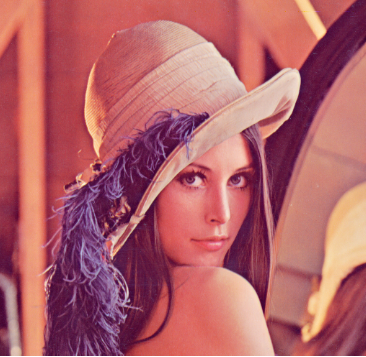

In [25]:
display(image) #Displaying the image

2. Display only the top left corner of 100x100 pixels. [using NumPy and
Array Indexing.]

In [26]:
import numpy as np
import matplotlib.pyplot as plt

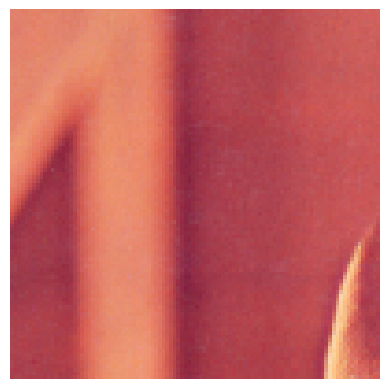

In [27]:
image_array = np.array(image) #Converting the image into numpy array
cropped_array = image_array[:100, :100] #Cropping the top-left 100x100 pixels
#Display the cropped image
plt.imshow(cropped_array)
plt.axis("off")
plt.show()

3. Show the three color channels (R, G, B). [using NumPy]

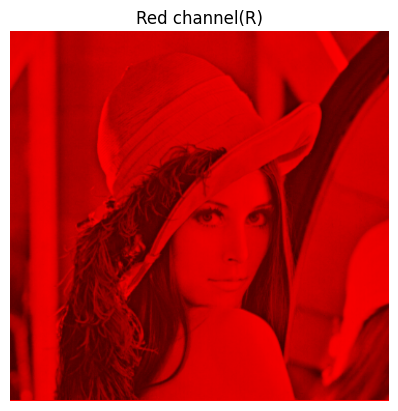

In [28]:
#Red channel
red = image_array.copy()
red [:, :, 1] = 0 #Green channel set to 0
red [:, :, 2] = 0 #Blue channel set to 0
plt.imshow(red)
plt.title("Red channel(R)")
plt.axis("off")
plt.show()

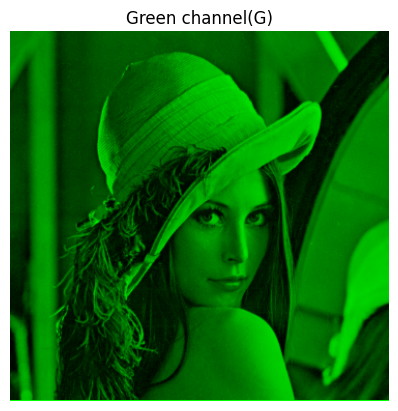

In [29]:
#Green channel
green = image_array.copy()
green[:, :, 0] = 0 #Red channel set to 0
green[:, :, 2] = 0 #Blue channel set to 0
plt.imshow(green)
plt.title("Green channel(G)")
plt.axis("off")
plt.show()

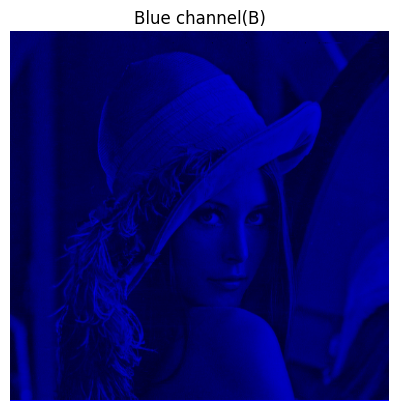

In [30]:
blue = image_array.copy()
blue[:, :, 0] = 0 #Red channlel set to 0
blue[:, :, 1] = 0 #Green channel set to 0
plt.imshow(blue)
plt.title("Blue channel(B)")
plt.axis("off")
plt.show()

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image.

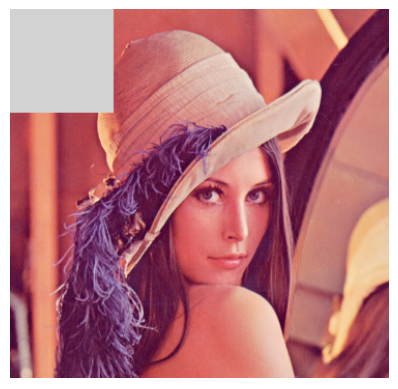

In [31]:
#Modify the top-left 100x100 pixels to light gray
image_array[:100, :100] = [210, 210, 210]
plt.imshow(image_array)
plt.axis("off")
plt.show()

##Exercise - 02

1. Load and display a grayscale image.

In [32]:
image_gray = Image.open("/content/drive/MyDrive/AI and DL/Week-01/grayscale.jpg").convert("L")#Load Image

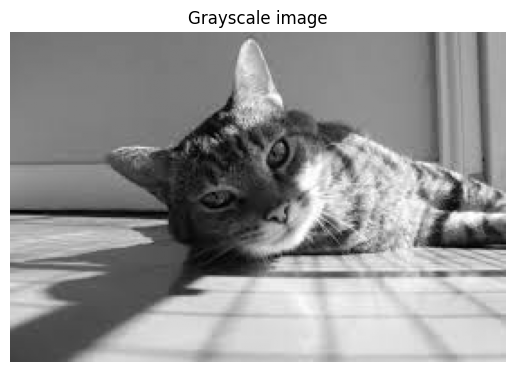

In [33]:
#Display image
plt.imshow(image_gray, cmap="gray")
plt.axis("off")
plt.title("Grayscale image")
plt.show()

2. Extract and display the middle section of the image (150 pixels).

In [34]:
image_gray_array = np.array(image_gray) #Converting the grayscale image intp array

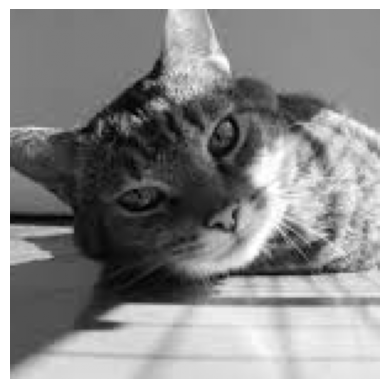

In [111]:
#Get the image dimension
height, width = image_gray_array.shape[:2]
#Calculate the center coordinates
x , y = width // 2, height // 2
#Calculate the starting and ending coordinates for the middle
start_x, end_x = x - 150//2, x + 150//2
start_y, end_y = y - 150//2, y + 150//2
#Extract the center 150x150 pixels
center_crop = image_gray_array[start_y:end_y, start_x:end_x]
#Display the center crop
plt.imshow(center_crop, cmap = "gray")
plt.axis("off")
plt.show()


3. Apply a simple threshold to the image. [set all pixel values below 100 to 0, and all values above 100 to 255]

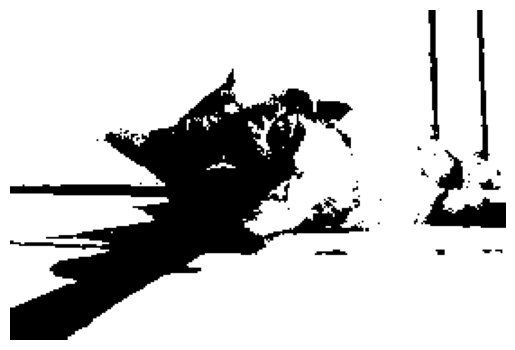

In [36]:
threshold_image = np.where(image_gray_array < 100, 0, 255).astype(np.uint8) #apply the threshold
#Display the image
plt.imshow(threshold_image, cmap = "gray")
plt.axis("off")
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.

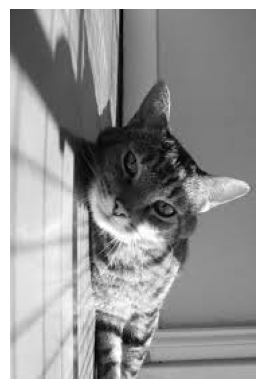

In [37]:
#Rotate the image using Pillow rotate
rotated_image = image_gray.rotate(-90, expand= True)
#Display the image
plt.imshow(rotated_image, cmap = "gray")
plt.axis("off")
plt.show()

5. Convert the grayscale image to an RGB image.

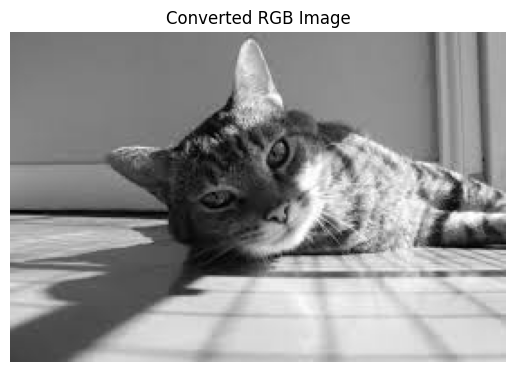

In [38]:
rgb_array = np.zeros((image_gray_array.shape[0], image_gray_array.shape[1], 3), dtype = np.uint8) #Create an empty array

#Assign the grayscale image to all three channels(R, G, B)
rgb_array[:, :, 0] = image_gray_array #Red channel
rgb_array[:, :, 1] = image_gray_array #Green channel
rgb_array[:, :, 2] = image_gray_array #Blue channel

#display the image
plt.imshow(rgb_array)
plt.axis("off")
plt.title("Converted RGB Image")
plt.show()

#Image Compression and Decompression using PCA.

1. Load and Prepare Data

225 225


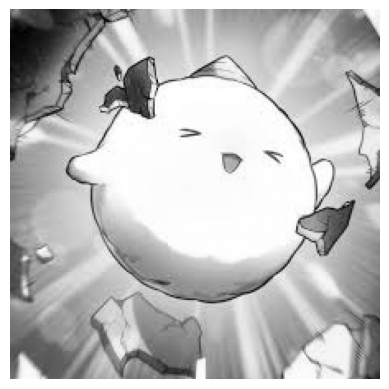

In [58]:
image1 = Image.open("/content/drive/MyDrive/AI and DL/Week-01/image2.jpg").convert("L") #Load image
image1_array = np.array(image1) #Convert image to array

height, width = image1_array.shape #size of the array
print(height, width)
data = image1_array.copy()

plt.imshow(image1_array, cmap = "gray") #Display the image
plt.axis("off")
plt.show()

In [68]:
#Center the dataset - Standaridze the Data.
mean = np.mean(data, axis = 0) #Compute the mean of each column( feature)

#Substract mean to center the data
centered_data = data - mean
centered_data.shape

(225, 225)

In [69]:
#Calculate the covaraince matrix of the Standaridze data.
cov_matrix = np.cov(centered_data, rowvar =False) #covariance matrix
cov_matrix.shape

(225, 225)

2. Eigen Decomposition and Identifying Principal Components:

In [70]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
# Sorting them in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices] #Eigen value
eigenvectors = eigenvectors[:, sorted_indices] #Eigen vector

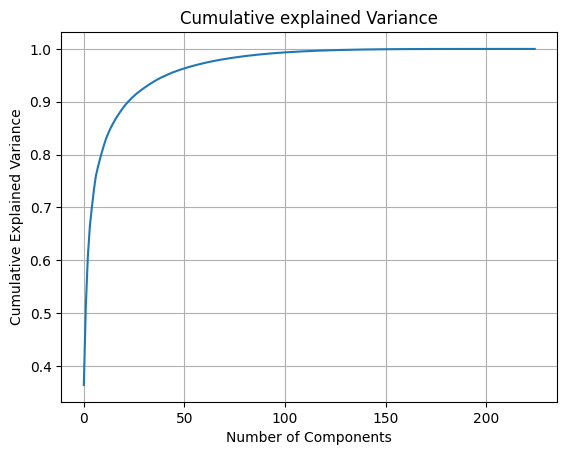

In [71]:
#Identifying the Principal Components with the help of Cumulative Sum Plot

# Compute explained variance ratio
explained_variance_ratio = eigenvalues/np.sum(eigenvalues)

# Plot cumulative explained variance
plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

3. Reconstruction and Experiment

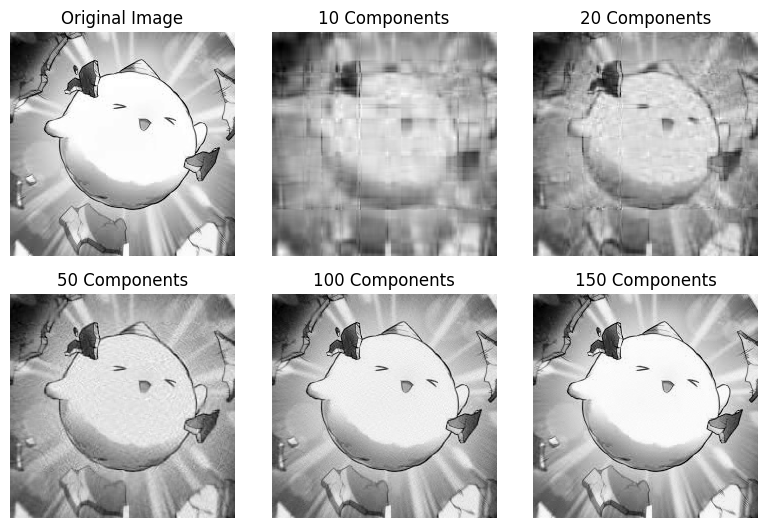

In [106]:
# List of k values to compare
k = [10, 20, 50, 100, 150]

# Create a figure with subplots
plt.figure(figsize=(8,8))
#Original Image
plt.subplot(3, 3, 1)  # Use a 2x3 grid, position 1
plt.imshow(image1_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")

for i, k in enumerate(k):
    # Select top k principal components
    components = eigenvectors[:, :k]

    # Compress the image
    compressed_data = np.dot(centered_data, components)

    # Decompress the image
    decompressed_data = np.dot(compressed_data, components.T) + mean

    # Plot the decompressed image
    plt.subplot(3, 3, i + 2)
    plt.imshow(decompressed_data, cmap="gray")
    plt.title(f"{k} Components")
    plt.axis("off")

# Show the images
plt.tight_layout()
plt.show()
